# Universidad del Valle de Guatemala
## Security Data Science - 10
* Walter Danilo Saldaña Salguero - 19897
* Javier Alejandro Cotto Argueta - 19324

## Laboratorio 4: Familias de Malware

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
import itertools
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from os import listdir
import os

In [14]:
%pip install pefile
import pefile

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Función para obtener las APIs de un PE

In [18]:
def get_pe_apis(pe):
    apis = []
    for entry in pe.DIRECTORY_ENTRY_IMPORT:
        dll_name = entry.dll.decode('utf-8')
        for func in entry.imports:
            apis.append(func.name.decode('utf-8'))
    return apis

Creación del DS

In [25]:
columns = set()
apis_pe = []

for i in range(1, 41):
    pe = pefile.PE(f'MALWR/{i}')
    apis = get_pe_apis(pe)
    columns.update(apis)
    apis_pe.append(apis)

data = {key: [] for key in columns}   
    

for api in apis_pe:
    for col in columns:
        val = 1 if col in api else 0
        data[col].append(val)

data

{'_adjust_fdiv': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0],
 'strstr': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0],
 'HttpEndRequestA': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0],
 '__set_app_type': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0],
 'OpenServiceA': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  

In [30]:
df = pd.DataFrame.from_dict(data)
df.head()

_adjust_fdiv  strstr  HttpEndRequestA  __set_app_type  OpenServiceA  \
0             0       0                0               0             0   
1             0       0                0               0             0   
2             0       0                0               0             0   
3             0       0                0               0             0   
4             0       0                0               0             0   

   _except_handler3  RegCloseKey  InternetCloseHandle  GetProcAddress  send  \
0                 0            0                    0               1     1   
1                 0            0                    0               1     0   
2                 0            0                    0               1     0   
3                 0            0                    0               1     0   
4                 0            0                    0               1     0   

   ...  BitBlt  _iob  _strnicmp  __CxxFrameHandler  OpenSCManagerA  memset  \
0  ...       0     0          0                  0               0       0   
1  ...       0     0          0                  0               0       0   
2  ...       0     0          0                  0               0       0   
3  ...       0     0          0                  0               0       0   
4  ...       0     0          0                  0               0       0   

   GetModuleFileNameA  CloseHandle  __dllonexit  LoadLibraryA  
0                   0            0            0             1  
1                   0            0            0             1  
2                   0            0            0             1  
3                   0            0            0             1  
4                   0            0            0             1  

[5 rows x 117 columns]

In [53]:
df.to_csv('malware.csv', index=True)

In [3]:
df = pd.read_csv('malware.csv')
df.head()

Unnamed: 0  _adjust_fdiv  strstr  HttpEndRequestA  __set_app_type  \
0           0             0       0                0               0   
1           1             0       0                0               0   
2           2             0       0                0               0   
3           3             0       0                0               0   
4           4             0       0                0               0   

   OpenServiceA  _except_handler3  RegCloseKey  InternetCloseHandle  \
0             0                 0            0                    0   
1             0                 0            0                    0   
2             0                 0            0                    0   
3             0                 0            0                    0   
4             0                 0            0                    0   

   GetProcAddress  ...  _iob  _strnicmp  __CxxFrameHandler  OpenSCManagerA  \
0               1  ...     0          0                  0               0   
1               1  ...     0          0                  0               0   
2               1  ...     0          0                  0               0   
3               1  ...     0          0                  0               0   
4               1  ...     0          0                  0               0   

   memset  GetModuleFileNameA  CloseHandle  __dllonexit  LoadLibraryA  family  
0       0                   0            0            0             1       1  
1       0                   0            0            0             1       1  
2       0                   0            0            0             1       1  
3       0                   0            0            0             1       1  
4       0                   0            0            0             1       1  

[5 rows x 119 columns]

### Exploración de Datos
Mostramos algunos datos del data set

#### Cantidad de Filas y Columnas

In [4]:
df.shape

(40, 119)

#### Columnas, nulos y tipos de datos

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Columns: 117 entries, _adjust_fdiv to LoadLibraryA
dtypes: int64(117)
memory usage: 36.7 KB


#### Descripción estadistica de los datos

In [33]:
df.describe()

_adjust_fdiv     strstr  HttpEndRequestA  __set_app_type  OpenServiceA  \
count     40.000000  40.000000        40.000000       40.000000     40.000000   
mean       0.200000   0.200000         0.200000        0.200000      0.025000   
std        0.405096   0.405096         0.405096        0.405096      0.158114   
min        0.000000   0.000000         0.000000        0.000000      0.000000   
25%        0.000000   0.000000         0.000000        0.000000      0.000000   
50%        0.000000   0.000000         0.000000        0.000000      0.000000   
75%        0.000000   0.000000         0.000000        0.000000      0.000000   
max        1.000000   1.000000         1.000000        1.000000      1.000000   

       _except_handler3  RegCloseKey  InternetCloseHandle  GetProcAddress  \
count         40.000000    40.000000            40.000000       40.000000   
mean           0.200000     0.200000             0.200000        0.800000   
std            0.405096     0.405096             0.405096        0.405096   
min            0.000000     0.000000             0.000000        0.000000   
25%            0.000000     0.000000             0.000000        1.000000   
50%            0.000000     0.000000             0.000000        1.000000   
75%            0.000000     0.000000             0.000000        1.000000   
max            1.000000     1.000000             1.000000        1.000000   

            send  ...     BitBlt      _iob  _strnicmp  __CxxFrameHandler  \
count  40.000000  ...  40.000000  40.00000  40.000000          40.000000   
mean    0.175000  ...   0.200000   0.15000   0.200000           0.200000   
std     0.384808  ...   0.405096   0.36162   0.405096           0.405096   
min     0.000000  ...   0.000000   0.00000   0.000000           0.000000   
25%     0.000000  ...   0.000000   0.00000   0.000000           0.000000   
50%     0.000000  ...   0.000000   0.00000   0.000000           0.000000   
75%     0.000000  ...   0.000000   0.00000   0.000000           0.000000   
max     1.000000  ...   1.000000   1.00000   1.000000           1.000000   

       OpenSCManagerA     memset  GetModuleFileNameA  CloseHandle  \
count       40.000000  40.000000           40.000000    40.000000   
mean         0.025000   0.200000            0.025000     0.200000   
std          0.158114   0.405096            0.158114     0.405096   
min          0.000000   0.000000            0.000000     0.000000   
25%          0.000000   0.000000            0.000000     0.000000   
50%          0.000000   0.000000            0.000000     0.000000   
75%          0.000000   0.000000            0.000000     0.000000   
max          1.000000   1.000000            1.000000     1.000000   

       __dllonexit  LoadLibraryA  
count    40.000000     40.000000  
mean      0.200000      0.800000  
std       0.405096      0.405096  
min       0.000000      0.000000  
25%       0.000000      1.000000  
50%       0.000000      1.000000  
75%       0.000000      1.000000  
max       1.000000      1.000000  

[8 rows x 117 columns]

Con ayuda de Pandas Profiling nos ahorraremos varias lineas de código para realizar el analisis exploratorio del dataset

In [5]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof

C:\Users\Javier Cotto\AppData\Local\Temp\ipykernel_17788\3036991050.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

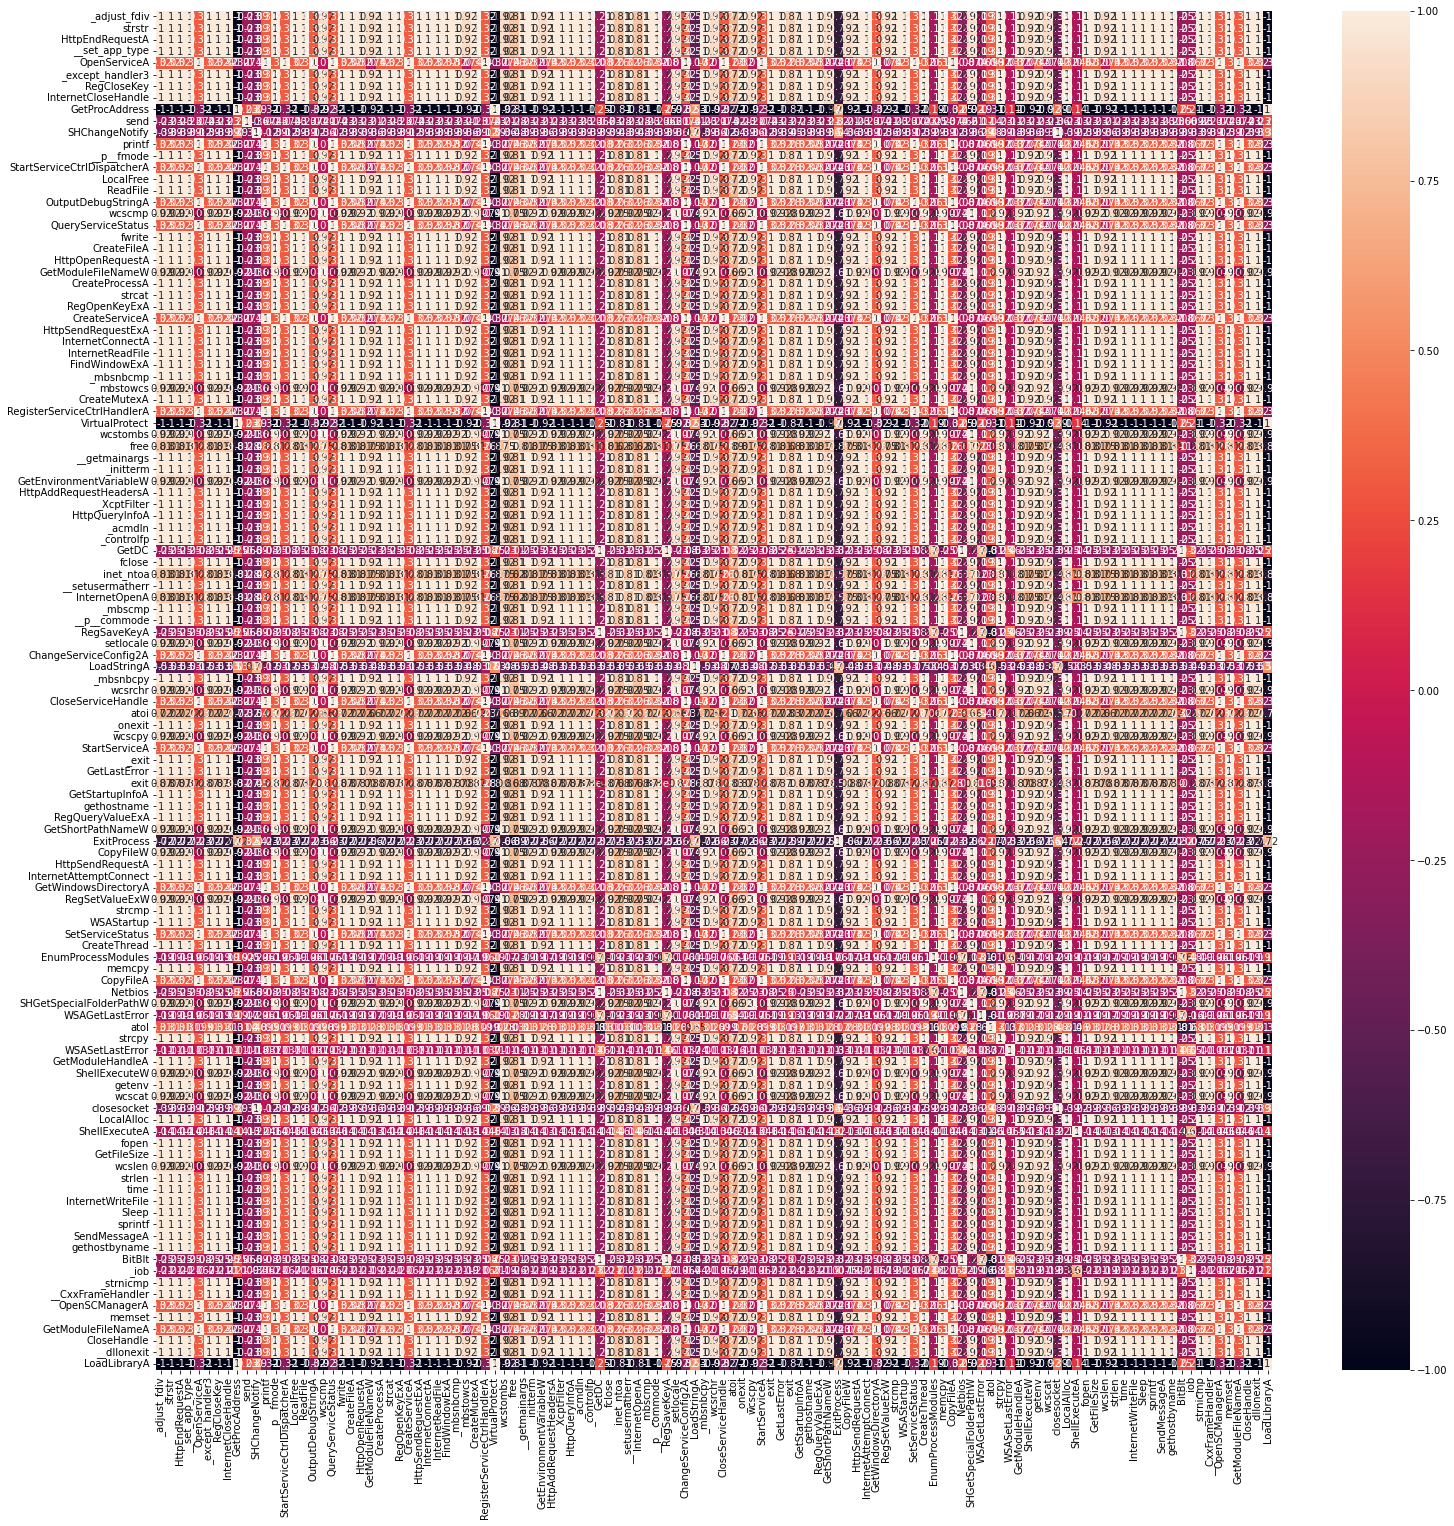

In [38]:
correlacion = df.corr()
fig, axis = plt.subplots(figsize=(25, 25))
sns.heatmap(correlacion, xticklabels=correlacion.columns, yticklabels=correlacion.columns, annot=True, ax=axis)

## Implementación de K-Means

### Método del Codo

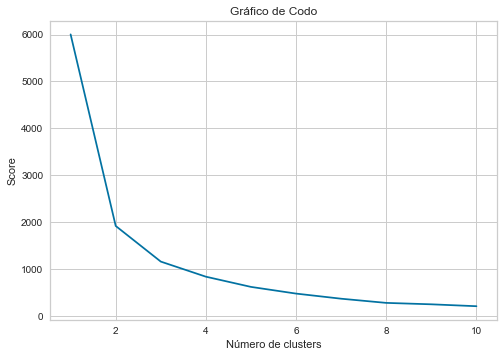

In [6]:
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

### Cálculo del coeficiente de Silhouette

0.5368590859033862
0.4517704580275371
0.47282691260898096


C:\Users\Javier Cotto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\Javier Cotto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\Javier Cotto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


0.43061498919415253


C:\Users\Javier Cotto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


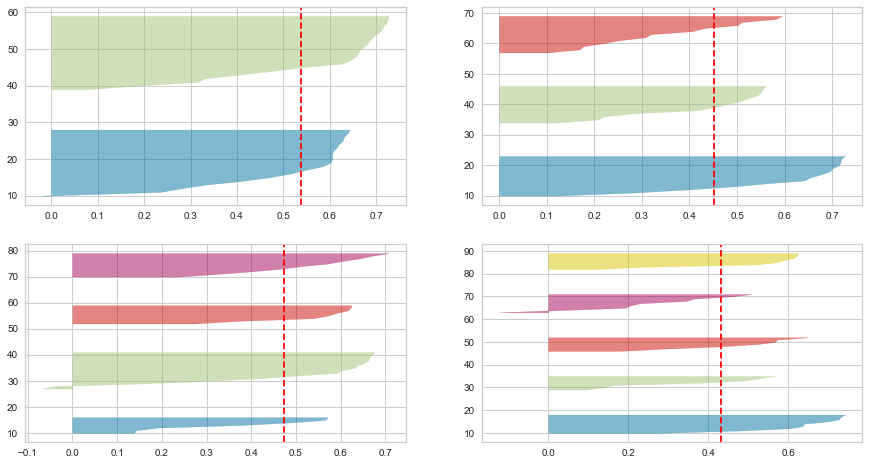

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    print(silhouette_score(df, km.fit_predict(df)))
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df)

### Kmeans

In [8]:
kmeans = cluster.KMeans(n_clusters = 2)
y_kmeans = kmeans.fit_predict(df)
df['family'] = y_kmeans
df.sample(15)

Unnamed: 0  _adjust_fdiv  strstr  HttpEndRequestA  __set_app_type  \
37          37             0       0                0               0   
31          31             1       1                1               1   
25          25             0       0                0               0   
32          32             0       0                0               0   
34          34             0       0                0               0   
38          38             0       0                0               0   
3            3             0       0                0               0   
15          15             0       0                0               0   
35          35             0       0                0               0   
36          36             1       1                1               1   
26          26             0       0                0               0   
11          11             0       0                0               0   
20          20             0       0                0               0   
6            6             0       0                0               0   
5            5             0       0                0               0   

    OpenServiceA  _except_handler3  RegCloseKey  InternetCloseHandle  \
37             0                 0            0                    0   
31             0                 1            1                    1   
25             0                 0            0                    0   
32             0                 0            0                    0   
34             0                 0            0                    0   
38             0                 0            0                    0   
3              0                 0            0                    0   
15             0                 0            0                    0   
35             0                 0            0                    0   
36             0                 1            1                    1   
26             0                 0            0                    0   
11             0                 0            0                    0   
20             0                 0            0                    0   
6              0                 0            0                    0   
5              0                 0            0                    0   

    GetProcAddress  ...  _iob  _strnicmp  __CxxFrameHandler  OpenSCManagerA  \
37               1  ...     0          0                  0               0   
31               0  ...     0          1                  1               0   
25               1  ...     0          0                  0               0   
32               1  ...     0          0                  0               0   
34               1  ...     1          0                  0               0   
38               1  ...     1          0                  0               0   
3                1  ...     0          0                  0               0   
15               1  ...     0          0                  0               0   
35               1  ...     1          0                  0               0   
36               0  ...     0          1                  1               0   
26               1  ...     0          0                  0               0   
11               1  ...     1          0                  0               0   
20               1  ...     0          0                  0               0   
6                1  ...     0          0                  0               0   
5                1  ...     0          0                  0               0   

    memset  GetModuleFileNameA  CloseHandle  __dllonexit  LoadLibraryA  family  
37       0                   0            0            0             1       1  
31       1                   0            1            1             0       1  
25       0                   0            0            0             1       1  
32       0                   0            0            0             1       1  
34       0  

Ejecutamos jaccard

In [ ]:
from similitudjaccard import *

run_jaccard()

El output del programa fue:

Extracted 134 attributes from ./MALWR/FGJKJJ1_2BA0D0083976A5C1E3315413CDCFFCD2 ...
Extracted 134 attributes from ./MALWR/JH78C0A33A1B472A8C16123FD696A5CE5EBB ...
Extracted 134 attributes from ./MALWR/FHHH6576C196385407B0F7F4B1B537D88983 ...
Extracted 6296 attributes from ./MALWR/B98hX8E8622C393D7E832D39E620EAD5D3B49 ...
Extracted 20 attributes from ./MALWR/.DS_Store ...
Extracted 235 attributes from ./MALWR/POL55_A4F1ECC4D25B33395196B5D51A06790 ...
Extracted 134 attributes from ./MALWR/65018CD542145A3792BA09985734C12A ...
Extracted 236 attributes from ./MALWR/K99_C3A9A7B026BFE0E55FF219FD6AA7D94 ...
Extracted 6939 attributes from ./MALWR/QW2_4C6BDDCCA2695D6202DF38708E14FC7E ...
Extracted 236 attributes from ./MALWR/DS22_A670D13D4D014169C4080328B8FEB86 ...
Extracted 6973 attributes from ./MALWR/FGTR43_EF8E0FB20E7228C7492CCDC59D87C690 ...
Extracted 272 attributes from ./MALWR/RTC_7F85D7F628CE62D1D8F7B39D8940472 ...
Extracted 134 attributes from ./MALWR/BVJ2D9FBF759F527AF373E34673DC3ACA462 ...
Extracted 239 attributes from ./MALWR/SAM_B659D71AE168E774FAAF38DB30F4A84 ...
Extracted 134 attributes from ./MALWR/JKK8CA6FE7A1315AF5AFEAC2961460A80569 ...
Extracted 235 attributes from ./MALWR/KLp90_6D5C8FC4B14559F73B6136D85B94198 ...
Extracted 112 attributes from ./MALWR/B07322743778B5868475DBE66EEDAC4F ...
Extracted 7239 attributes from ./MALWR/VC990_468FF2C12CFFC7E5B2FE0EE6BB3B239E ...
Extracted 134 attributes from ./MALWR/650A6FCA433EE243391E4B4C11F09438 ...
Extracted 7239 attributes from ./MALWR/TG78Z__727A6800991EEAD454E53E8AF164A99C ...
Extracted 7911 attributes from ./MALWR/AAAz2E1B6940985A23E5639450F8391820655 ...
Extracted 243 attributes from ./MALWR/GFT4_7DDD3D72EAD03C7518F5D47650C8572 ...
Extracted 7929 attributes from ./MALWR/PL98_BD8B082B7711BC980252F988BB0CA936 ...
Extracted 112 attributes from ./MALWR/FTTR9EA3C16194CE354C244C1B74C46CD92E ...
Extracted 134 attributes from ./MALWR/HJGQDD892986B2249B5214639ECC8AC0223 ...
Extracted 112 attributes from ./MALWR/8442AE37B91F279A9F06DE4C60B286A3 ...
Extracted 134 attributes from ./MALWR/A316D5AECA269CA865077E7FFF356E7D ...
Extracted 134 attributes from ./MALWR/6FAA4740F99408D4D2DDDD0B09BBDEFD ...
Extracted 272 attributes from ./MALWR/L11_1415EB8519D13328091CC5C76A624E3D ...
Extracted 112 attributes from ./MALWR/F6655E39465C2FF5B016980D918EA028 ...
Extracted 134 attributes from ./MALWR/F8437E44748D2C3FCF84019766F4E6DC ...
Extracted 134 attributes from ./MALWR/99A39866A657A10949FCB6D634BB30D5 ...
Extracted 134 attributes from ./MALWR/785003A405BC7A4EBCBB21DDB757BF3F ...
Extracted 7929 attributes from ./MALWR/AL65_DB05DF0498B59B42A8E493CF3C10C578 ...
Extracted 112 attributes from ./MALWR/1F2EB7B090018D975E6D9B40868C94CA ...
Extracted 235 attributes from ./MALWR/NV99_C9C9DBF388A8D81D8CFB4D3FC05F8E4 ...
Extracted 272 attributes from ./MALWR/VBMM9_149B7BD7218AAB4E257D28469FDDB0D ...
Extracted 240 attributes from ./MALWR/GBV66_8F259BB36E00D124963CFA9B86F502E ...
Extracted 112 attributes from ./MALWR/EEE99EC8AA67B05407C01094184C33D2B5A44 ...
Extracted 134 attributes from ./MALWR/NBV_8B75BCBFF174C25A0161F30758509A44 ...
Extracted 134 attributes from ./MALWR/33DE5067A433A6EC5C328067DC18EC37 ...
./MALWR/FGJKJJ1_2BA0D0083976A5C1E3315413CDCFFCD2 ./MALWR/JH78C0A33A1B472A8C16123FD696A5CE5EBB 1.0
./MALWR/FGJKJJ1_2BA0D0083976A5C1E3315413CDCFFCD2 ./MALWR/FHHH6576C196385407B0F7F4B1B537D88983 1.0
./MALWR/FGJKJJ1_2BA0D0083976A5C1E3315413CDCFFCD2 ./MALWR/65018CD542145A3792BA09985734C12A 0.8611111111111112
./MALWR/FGJKJJ1_2BA0D0083976A5C1E3315413CDCFFCD2 ./MALWR/BVJ2D9FBF759F527AF373E34673DC3ACA462 1.0
./MALWR/FGJKJJ1_2BA0D0083976A5C1E3315413CDCFFCD2 ./MALWR/JKK8CA6FE7A1315AF5AFEAC2961460A80569 1.0
./MALWR/FGJKJJ1_2BA0D0083976A5C1E3315413CDCFFCD2 ./MALWR/B07322743778B5868475DBE66EEDAC4F 0.7083333333333334
./MALWR/FGJKJJ1_2BA0D0083976A5C1E3315413CDCFFCD2 ./MALWR/650A6FCA433EE243391E4B4C11F09438 1.0
./MALWR/FGJKJJ1_2BA0D0083976A5C1E3315413CDCFFCD2 ./MALWR/FTTR9EA3C16194CE354C244C1B74C46CD92E 0.7083333333333334
./MALWR/FGJKJJ1_2BA0D0083976A5C1E3315413CDCFFCD2 ./MALWR/HJGQDD892986B2249B5214639ECC8AC0223 1.0
./MALWR/FGJKJJ1_2BA0D0083976A5C1E3315413CDCFFCD2 ./MALWR/8442AE37B91F279A9F06DE4C60B286A3 0.7083333333333334
./MALWR/FGJKJJ1_2BA0D0083976A5C1E3315413CDCFFCD2 ./MALWR/A316D5AECA269CA865077E7FFF356E7D 1.0
./MALWR/FGJKJJ1_2BA0D0083976A5C1E3315413CDCFFCD2 ./MALWR/6FAA4740F99408D4D2DDDD0B09BBDEFD 1.0
./MALWR/FGJKJJ1_2BA0D0083976A5C1E3315413CDCFFCD2 ./MALWR/F6655E39465C2FF5B016980D918EA028 0.7083333333333334
./MALWR/FGJKJJ1_2BA0D0083976A5C1E3315413CDCFFCD2 ./MALWR/F8437E44748D2C3FCF84019766F4E6DC 1.0
./MALWR/FGJKJJ1_2BA0D0083976A5C1E3315413CDCFFCD2 ./MALWR/99A39866A657A10949FCB6D634BB30D5 0.8611111111111112
./MALWR/FGJKJJ1_2BA0D0083976A5C1E3315413CDCFFCD2 ./MALWR/785003A405BC7A4EBCBB21DDB757BF3F 1.0
./MALWR/FGJKJJ1_2BA0D0083976A5C1E3315413CDCFFCD2 ./MALWR/1F2EB7B090018D975E6D9B40868C94CA 0.7083333333333334
./MALWR/FGJKJJ1_2BA0D0083976A5C1E3315413CDCFFCD2 ./MALWR/EEE99EC8AA67B05407C01094184C33D2B5A44 0.7083333333333334
./MALWR/FGJKJJ1_2BA0D0083976A5C1E3315413CDCFFCD2 ./MALWR/NBV_8B75BCBFF174C25A0161F30758509A44 1.0
./MALWR/FGJKJJ1_2BA0D0083976A5C1E3315413CDCFFCD2 ./MALWR/33DE5067A433A6EC5C328067DC18EC37 0.8611111111111112
./MALWR/JH78C0A33A1B472A8C16123FD696A5CE5EBB ./MALWR/FHHH6576C196385407B0F7F4B1B537D88983 1.0
./MALWR/JH78C0A33A1B472A8C16123FD696A5CE5EBB ./MALWR/65018CD542145A3792BA09985734C12A 0.8611111111111112
./MALWR/JH78C0A33A1B472A8C16123FD696A5CE5EBB ./MALWR/BVJ2D9FBF759F527AF373E34673DC3ACA462 1.0
./MALWR/JH78C0A33A1B472A8C16123FD696A5CE5EBB ./MALWR/JKK8CA6FE7A1315AF5AFEAC2961460A80569 1.0
./MALWR/JH78C0A33A1B472A8C16123FD696A5CE5EBB ./MALWR/B07322743778B5868475DBE66EEDAC4F 0.7083333333333334
./MALWR/JH78C0A33A1B472A8C16123FD696A5CE5EBB ./MALWR/650A6FCA433EE243391E4B4C11F09438 1.0
./MALWR/JH78C0A33A1B472A8C16123FD696A5CE5EBB ./MALWR/FTTR9EA3C16194CE354C244C1B74C46CD92E 0.7083333333333334
./MALWR/JH78C0A33A1B472A8C16123FD696A5CE5EBB ./MALWR/HJGQDD892986B2249B5214639ECC8AC0223 1.0
./MALWR/JH78C0A33A1B472A8C16123FD696A5CE5EBB ./MALWR/8442AE37B91F279A9F06DE4C60B286A3 0.7083333333333334
./MALWR/JH78C0A33A1B472A8C16123FD696A5CE5EBB ./MALWR/A316D5AECA269CA865077E7FFF356E7D 1.0
./MALWR/JH78C0A33A1B472A8C16123FD696A5CE5EBB ./MALWR/6FAA4740F99408D4D2DDDD0B09BBDEFD 1.0
./MALWR/JH78C0A33A1B472A8C16123FD696A5CE5EBB ./MALWR/F6655E39465C2FF5B016980D918EA028 0.7083333333333334
./MALWR/JH78C0A33A1B472A8C16123FD696A5CE5EBB ./MALWR/F8437E44748D2C3FCF84019766F4E6DC 1.0
./MALWR/JH78C0A33A1B472A8C16123FD696A5CE5EBB ./MALWR/99A39866A657A10949FCB6D634BB30D5 0.8611111111111112
./MALWR/JH78C0A33A1B472A8C16123FD696A5CE5EBB ./MALWR/785003A405BC7A4EBCBB21DDB757BF3F 1.0
./MALWR/JH78C0A33A1B472A8C16123FD696A5CE5EBB ./MALWR/1F2EB7B090018D975E6D9B40868C94CA 0.7083333333333334
./MALWR/JH78C0A33A1B472A8C16123FD696A5CE5EBB ./MALWR/EEE99EC8AA67B05407C01094184C33D2B5A44 0.7083333333333334
./MALWR/JH78C0A33A1B472A8C16123FD696A5CE5EBB ./MALWR/NBV_8B75BCBFF174C25A0161F30758509A44 1.0
./MALWR/JH78C0A33A1B472A8C16123FD696A5CE5EBB ./MALWR/33DE5067A433A6EC5C328067DC18EC37 0.8611111111111112
./MALWR/FHHH6576C196385407B0F7F4B1B537D88983 ./MALWR/65018CD542145A3792BA09985734C12A 0.8611111111111112
./MALWR/FHHH6576C196385407B0F7F4B1B537D88983 ./MALWR/BVJ2D9FBF759F527AF373E34673DC3ACA462 1.0
./MALWR/FHHH6576C196385407B0F7F4B1B537D88983 ./MALWR/JKK8CA6FE7A1315AF5AFEAC2961460A80569 1.0
./MALWR/FHHH6576C196385407B0F7F4B1B537D88983 ./MALWR/B07322743778B5868475DBE66EEDAC4F 0.7083333333333334
./MALWR/FHHH6576C196385407B0F7F4B1B537D88983 ./MALWR/650A6FCA433EE243391E4B4C11F09438 1.0
./MALWR/FHHH6576C196385407B0F7F4B1B537D88983 ./MALWR/FTTR9EA3C16194CE354C244C1B74C46CD92E 0.7083333333333334
./MALWR/FHHH6576C196385407B0F7F4B1B537D88983 ./MALWR/HJGQDD892986B2249B5214639ECC8AC0223 1.0
./MALWR/FHHH6576C196385407B0F7F4B1B537D88983 ./MALWR/8442AE37B91F279A9F06DE4C60B286A3 0.7083333333333334
./MALWR/FHHH6576C196385407B0F7F4B1B537D88983 ./MALWR/A316D5AECA269CA865077E7FFF356E7D 1.0
./MALWR/FHHH6576C196385407B0F7F4B1B537D88983 ./MALWR/6FAA4740F99408D4D2DDDD0B09BBDEFD 1.0
./MALWR/FHHH6576C196385407B0F7F4B1B537D88983 ./MALWR/F6655E39465C2FF5B016980D918EA028 0.7083333333333334
./MALWR/FHHH6576C196385407B0F7F4B1B537D88983 ./MALWR/F8437E44748D2C3FCF84019766F4E6DC 1.0
./MALWR/FHHH6576C196385407B0F7F4B1B537D88983 ./MALWR/99A39866A657A10949FCB6D634BB30D5 0.8611111111111112
./MALWR/FHHH6576C196385407B0F7F4B1B537D88983 ./MALWR/785003A405BC7A4EBCBB21DDB757BF3F 1.0
./MALWR/FHHH6576C196385407B0F7F4B1B537D88983 ./MALWR/1F2EB7B090018D975E6D9B40868C94CA 0.7083333333333334
./MALWR/FHHH6576C196385407B0F7F4B1B537D88983 ./MALWR/EEE99EC8AA67B05407C01094184C33D2B5A44 0.7083333333333334
./MALWR/FHHH6576C196385407B0F7F4B1B537D88983 ./MALWR/NBV_8B75BCBFF174C25A0161F30758509A44 1.0
./MALWR/FHHH6576C196385407B0F7F4B1B537D88983 ./MALWR/33DE5067A433A6EC5C328067DC18EC37 0.8611111111111112
./MALWR/B98hX8E8622C393D7E832D39E620EAD5D3B49 ./MALWR/QW2_4C6BDDCCA2695D6202DF38708E14FC7E 0.8202448081419337
./MALWR/B98hX8E8622C393D7E832D39E620EAD5D3B49 ./MALWR/FGTR43_EF8E0FB20E7228C7492CCDC59D87C690 0.8164271047227926
./MALWR/POL55_A4F1ECC4D25B33395196B5D51A06790 ./MALWR/K99_C3A9A7B026BFE0E55FF219FD6AA7D94 0.8764940239043825
./MALWR/POL55_A4F1ECC4D25B33395196B5D51A06790 ./MALWR/DS22_A670D13D4D014169C4080328B8FEB86 0.884
./MALWR/POL55_A4F1ECC4D25B33395196B5D51A06790 ./MALWR/SAM_B659D71AE168E774FAAF38DB30F4A84 0.8809523809523809
./MALWR/POL55_A4F1ECC4D25B33395196B5D51A06790 ./MALWR/KLp90_6D5C8FC4B14559F73B6136D85B94198 0.8875502008032129
./MALWR/POL55_A4F1ECC4D25B33395196B5D51A06790 ./MALWR/NV99_C9C9DBF388A8D81D8CFB4D3FC05F8E4 0.8875502008032129
./MALWR/POL55_A4F1ECC4D25B33395196B5D51A06790 ./MALWR/GBV66_8F259BB36E00D124963CFA9B86F502E 0.7924528301886793
./MALWR/65018CD542145A3792BA09985734C12A ./MALWR/BVJ2D9FBF759F527AF373E34673DC3ACA462 0.8611111111111112
./MALWR/65018CD542145A3792BA09985734C12A ./MALWR/JKK8CA6FE7A1315AF5AFEAC2961460A80569 0.8611111111111112
./MALWR/65018CD542145A3792BA09985734C12A ./MALWR/650A6FCA433EE243391E4B4C11F09438 0.8611111111111112
./MALWR/65018CD542145A3792BA09985734C12A ./MALWR/HJGQDD892986B2249B5214639ECC8AC0223 0.8611111111111112
./MALWR/65018CD542145A3792BA09985734C12A ./MALWR/A316D5AECA269CA865077E7FFF356E7D 0.8611111111111112
./MALWR/65018CD542145A3792BA09985734C12A ./MALWR/6FAA4740F99408D4D2DDDD0B09BBDEFD 0.8611111111111112
./MALWR/65018CD542145A3792BA09985734C12A ./MALWR/F8437E44748D2C3FCF84019766F4E6DC 0.8611111111111112
./MALWR/65018CD542145A3792BA09985734C12A ./MALWR/99A39866A657A10949FCB6D634BB30D5 1.0
./MALWR/65018CD542145A3792BA09985734C12A ./MALWR/785003A405BC7A4EBCBB21DDB757BF3F 0.8611111111111112
./MALWR/65018CD542145A3792BA09985734C12A ./MALWR/NBV_8B75BCBFF174C25A0161F30758509A44 0.8611111111111112
./MALWR/65018CD542145A3792BA09985734C12A ./MALWR/33DE5067A433A6EC5C328067DC18EC37 1.0
./MALWR/K99_C3A9A7B026BFE0E55FF219FD6AA7D94 ./MALWR/DS22_A670D13D4D014169C4080328B8FEB86 0.9423868312757202
./MALWR/K99_C3A9A7B026BFE0E55FF219FD6AA7D94 ./MALWR/SAM_B659D71AE168E774FAAF38DB30F4A84 0.85546875
./MALWR/K99_C3A9A7B026BFE0E55FF219FD6AA7D94 ./MALWR/KLp90_6D5C8FC4B14559F73B6136D85B94198 0.9462809917355371
./MALWR/K99_C3A9A7B026BFE0E55FF219FD6AA7D94 ./MALWR/NV99_C9C9DBF388A8D81D8CFB4D3FC05F8E4 0.9462809917355371
./MALWR/K99_C3A9A7B026BFE0E55FF219FD6AA7D94 ./MALWR/GBV66_8F259BB36E00D124963CFA9B86F502E 0.7564575645756457
./MALWR/QW2_4C6BDDCCA2695D6202DF38708E14FC7E ./MALWR/FGTR43_EF8E0FB20E7228C7492CCDC59D87C690 0.8576578982507678
./MALWR/DS22_A670D13D4D014169C4080328B8FEB86 ./MALWR/SAM_B659D71AE168E774FAAF38DB30F4A84 0.85546875
./MALWR/DS22_A670D13D4D014169C4080328B8FEB86 ./MALWR/KLp90_6D5C8FC4B14559F73B6136D85B94198 0.9543568464730291
./MALWR/DS22_A670D13D4D014169C4080328B8FEB86 ./MALWR/NV99_C9C9DBF388A8D81D8CFB4D3FC05F8E4 0.9543568464730291
./MALWR/DS22_A670D13D4D014169C4080328B8FEB86 ./MALWR/GBV66_8F259BB36E00D124963CFA9B86F502E 0.7564575645756457
./MALWR/RTC_7F85D7F628CE62D1D8F7B39D8940472 ./MALWR/L11_1415EB8519D13328091CC5C76A624E3D 0.9710144927536232
./MALWR/RTC_7F85D7F628CE62D1D8F7B39D8940472 ./MALWR/VBMM9_149B7BD7218AAB4E257D28469FDDB0D 0.9781818181818182
./MALWR/BVJ2D9FBF759F527AF373E34673DC3ACA462 ./MALWR/JKK8CA6FE7A1315AF5AFEAC2961460A80569 1.0
./MALWR/BVJ2D9FBF759F527AF373E34673DC3ACA462 ./MALWR/B07322743778B5868475DBE66EEDAC4F 0.7083333333333334
./MALWR/BVJ2D9FBF759F527AF373E34673DC3ACA462 ./MALWR/650A6FCA433EE243391E4B4C11F09438 1.0
./MALWR/BVJ2D9FBF759F527AF373E34673DC3ACA462 ./MALWR/FTTR9EA3C16194CE354C244C1B74C46CD92E 0.7083333333333334
./MALWR/BVJ2D9FBF759F527AF373E34673DC3ACA462 ./MALWR/HJGQDD892986B2249B5214639ECC8AC0223 1.0
./MALWR/BVJ2D9FBF759F527AF373E34673DC3ACA462 ./MALWR/8442AE37B91F279A9F06DE4C60B286A3 0.7083333333333334
./MALWR/BVJ2D9FBF759F527AF373E34673DC3ACA462 ./MALWR/A316D5AECA269CA865077E7FFF356E7D 1.0
./MALWR/BVJ2D9FBF759F527AF373E34673DC3ACA462 ./MALWR/6FAA4740F99408D4D2DDDD0B09BBDEFD 1.0
./MALWR/BVJ2D9FBF759F527AF373E34673DC3ACA462 ./MALWR/F6655E39465C2FF5B016980D918EA028 0.7083333333333334
./MALWR/BVJ2D9FBF759F527AF373E34673DC3ACA462 ./MALWR/F8437E44748D2C3FCF84019766F4E6DC 1.0
./MALWR/BVJ2D9FBF759F527AF373E34673DC3ACA462 ./MALWR/99A39866A657A10949FCB6D634BB30D5 0.8611111111111112
./MALWR/BVJ2D9FBF759F527AF373E34673DC3ACA462 ./MALWR/785003A405BC7A4EBCBB21DDB757BF3F 1.0
./MALWR/BVJ2D9FBF759F527AF373E34673DC3ACA462 ./MALWR/1F2EB7B090018D975E6D9B40868C94CA 0.7083333333333334
./MALWR/BVJ2D9FBF759F527AF373E34673DC3ACA462 ./MALWR/EEE99EC8AA67B05407C01094184C33D2B5A44 0.7083333333333334
./MALWR/BVJ2D9FBF759F527AF373E34673DC3ACA462 ./MALWR/NBV_8B75BCBFF174C25A0161F30758509A44 1.0
./MALWR/BVJ2D9FBF759F527AF373E34673DC3ACA462 ./MALWR/33DE5067A433A6EC5C328067DC18EC37 0.8611111111111112
./MALWR/SAM_B659D71AE168E774FAAF38DB30F4A84 ./MALWR/KLp90_6D5C8FC4B14559F73B6136D85B94198 0.8588235294117647
./MALWR/SAM_B659D71AE168E774FAAF38DB30F4A84 ./MALWR/NV99_C9C9DBF388A8D81D8CFB4D3FC05F8E4 0.8588235294117647
./MALWR/SAM_B659D71AE168E774FAAF38DB30F4A84 ./MALWR/GBV66_8F259BB36E00D124963CFA9B86F502E 0.7940074906367042
./MALWR/JKK8CA6FE7A1315AF5AFEAC2961460A80569 ./MALWR/B07322743778B5868475DBE66EEDAC4F 0.7083333333333334
./MALWR/JKK8CA6FE7A1315AF5AFEAC2961460A80569 ./MALWR/650A6FCA433EE243391E4B4C11F09438 1.0
./MALWR/JKK8CA6FE7A1315AF5AFEAC2961460A80569 ./MALWR/FTTR9EA3C16194CE354C244C1B74C46CD92E 0.7083333333333334
./MALWR/JKK8CA6FE7A1315AF5AFEAC2961460A80569 ./MALWR/HJGQDD892986B2249B5214639ECC8AC0223 1.0
./MALWR/JKK8CA6FE7A1315AF5AFEAC2961460A80569 ./MALWR/8442AE37B91F279A9F06DE4C60B286A3 0.7083333333333334
./MALWR/JKK8CA6FE7A1315AF5AFEAC2961460A80569 ./MALWR/A316D5AECA269CA865077E7FFF356E7D 1.0
./MALWR/JKK8CA6FE7A1315AF5AFEAC2961460A80569 ./MALWR/6FAA4740F99408D4D2DDDD0B09BBDEFD 1.0
./MALWR/JKK8CA6FE7A1315AF5AFEAC2961460A80569 ./MALWR/F6655E39465C2FF5B016980D918EA028 0.7083333333333334
./MALWR/JKK8CA6FE7A1315AF5AFEAC2961460A80569 ./MALWR/F8437E44748D2C3FCF84019766F4E6DC 1.0
./MALWR/JKK8CA6FE7A1315AF5AFEAC2961460A80569 ./MALWR/99A39866A657A10949FCB6D634BB30D5 0.8611111111111112
./MALWR/JKK8CA6FE7A1315AF5AFEAC2961460A80569 ./MALWR/785003A405BC7A4EBCBB21DDB757BF3F 1.0
./MALWR/JKK8CA6FE7A1315AF5AFEAC2961460A80569 ./MALWR/1F2EB7B090018D975E6D9B40868C94CA 0.7083333333333334
./MALWR/JKK8CA6FE7A1315AF5AFEAC2961460A80569 ./MALWR/EEE99EC8AA67B05407C01094184C33D2B5A44 0.7083333333333334
./MALWR/JKK8CA6FE7A1315AF5AFEAC2961460A80569 ./MALWR/NBV_8B75BCBFF174C25A0161F30758509A44 1.0
./MALWR/JKK8CA6FE7A1315AF5AFEAC2961460A80569 ./MALWR/33DE5067A433A6EC5C328067DC18EC37 0.8611111111111112
./MALWR/KLp90_6D5C8FC4B14559F73B6136D85B94198 ./MALWR/NV99_C9C9DBF388A8D81D8CFB4D3FC05F8E4 1.0
./MALWR/KLp90_6D5C8FC4B14559F73B6136D85B94198 ./MALWR/GBV66_8F259BB36E00D124963CFA9B86F502E 0.7657992565055762
./MALWR/B07322743778B5868475DBE66EEDAC4F ./MALWR/650A6FCA433EE243391E4B4C11F09438 0.7083333333333334
./MALWR/B07322743778B5868475DBE66EEDAC4F ./MALWR/FTTR9EA3C16194CE354C244C1B74C46CD92E 1.0
./MALWR/B07322743778B5868475DBE66EEDAC4F ./MALWR/HJGQDD892986B2249B5214639ECC8AC0223 0.7083333333333334
./MALWR/B07322743778B5868475DBE66EEDAC4F ./MALWR/8442AE37B91F279A9F06DE4C60B286A3 1.0
./MALWR/B07322743778B5868475DBE66EEDAC4F ./MALWR/A316D5AECA269CA865077E7FFF356E7D 0.7083333333333334
./MALWR/B07322743778B5868475DBE66EEDAC4F ./MALWR/6FAA4740F99408D4D2DDDD0B09BBDEFD 0.7083333333333334
./MALWR/B07322743778B5868475DBE66EEDAC4F ./MALWR/F6655E39465C2FF5B016980D918EA028 1.0
./MALWR/B07322743778B5868475DBE66EEDAC4F ./MALWR/F8437E44748D2C3FCF84019766F4E6DC 0.7083333333333334
./MALWR/B07322743778B5868475DBE66EEDAC4F ./MALWR/785003A405BC7A4EBCBB21DDB757BF3F 0.7083333333333334
./MALWR/B07322743778B5868475DBE66EEDAC4F ./MALWR/1F2EB7B090018D975E6D9B40868C94CA 1.0
./MALWR/B07322743778B5868475DBE66EEDAC4F ./MALWR/EEE99EC8AA67B05407C01094184C33D2B5A44 1.0
./MALWR/B07322743778B5868475DBE66EEDAC4F ./MALWR/NBV_8B75BCBFF174C25A0161F30758509A44 0.7083333333333334
./MALWR/VC990_468FF2C12CFFC7E5B2FE0EE6BB3B239E ./MALWR/TG78Z__727A6800991EEAD454E53E8AF164A99C 0.9997237569060774
./MALWR/VC990_468FF2C12CFFC7E5B2FE0EE6BB3B239E ./MALWR/AAAz2E1B6940985A23E5639450F8391820655 0.8061516452074392
./MALWR/VC990_468FF2C12CFFC7E5B2FE0EE6BB3B239E ./MALWR/PL98_BD8B082B7711BC980252F988BB0CA936 0.8039961941008563
./MALWR/VC990_468FF2C12CFFC7E5B2FE0EE6BB3B239E ./MALWR/AL65_DB05DF0498B59B42A8E493CF3C10C578 0.8042107767336744
./MALWR/650A6FCA433EE243391E4B4C11F09438 ./MALWR/FTTR9EA3C16194CE354C244C1B74C46CD92E 0.7083333333333334
./MALWR/650A6FCA433EE243391E4B4C11F09438 ./MALWR/HJGQDD892986B2249B5214639ECC8AC0223 1.0
./MALWR/650A6FCA433EE243391E4B4C11F09438 ./MALWR/8442AE37B91F279A9F06DE4C60B286A3 0.7083333333333334
./MALWR/650A6FCA433EE243391E4B4C11F09438 ./MALWR/A316D5AECA269CA865077E7FFF356E7D 1.0
./MALWR/650A6FCA433EE243391E4B4C11F09438 ./MALWR/6FAA4740F99408D4D2DDDD0B09BBDEFD 1.0
./MALWR/650A6FCA433EE243391E4B4C11F09438 ./MALWR/F6655E39465C2FF5B016980D918EA028 0.7083333333333334
./MALWR/650A6FCA433EE243391E4B4C11F09438 ./MALWR/F8437E44748D2C3FCF84019766F4E6DC 1.0
./MALWR/650A6FCA433EE243391E4B4C11F09438 ./MALWR/99A39866A657A10949FCB6D634BB30D5 0.8611111111111112
./MALWR/650A6FCA433EE243391E4B4C11F09438 ./MALWR/785003A405BC7A4EBCBB21DDB757BF3F 1.0
./MALWR/650A6FCA433EE243391E4B4C11F09438 ./MALWR/1F2EB7B090018D975E6D9B40868C94CA 0.7083333333333334
./MALWR/650A6FCA433EE243391E4B4C11F09438 ./MALWR/EEE99EC8AA67B05407C01094184C33D2B5A44 0.7083333333333334
./MALWR/650A6FCA433EE243391E4B4C11F09438 ./MALWR/NBV_8B75BCBFF174C25A0161F30758509A44 1.0
./MALWR/650A6FCA433EE243391E4B4C11F09438 ./MALWR/33DE5067A433A6EC5C328067DC18EC37 0.8611111111111112
./MALWR/TG78Z__727A6800991EEAD454E53E8AF164A99C ./MALWR/AAAz2E1B6940985A23E5639450F8391820655 0.8061516452074392
./MALWR/TG78Z__727A6800991EEAD454E53E8AF164A99C ./MALWR/PL98_BD8B082B7711BC980252F988BB0CA936 0.8039961941008563
./MALWR/TG78Z__727A6800991EEAD454E53E8AF164A99C ./MALWR/AL65_DB05DF0498B59B42A8E493CF3C10C578 0.8042107767336744
./MALWR/AAAz2E1B6940985A23E5639450F8391820655 ./MALWR/PL98_BD8B082B7711BC980252F988BB0CA936 0.9894498869630746
./MALWR/AAAz2E1B6940985A23E5639450F8391820655 ./MALWR/AL65_DB05DF0498B59B42A8E493CF3C10C578 0.9894498869630746
./MALWR/PL98_BD8B082B7711BC980252F988BB0CA936 ./MALWR/AL65_DB05DF0498B59B42A8E493CF3C10C578 0.9992435703479576
./MALWR/FTTR9EA3C16194CE354C244C1B74C46CD92E ./MALWR/HJGQDD892986B2249B5214639ECC8AC0223 0.7083333333333334
./MALWR/FTTR9EA3C16194CE354C244C1B74C46CD92E ./MALWR/8442AE37B91F279A9F06DE4C60B286A3 1.0
./MALWR/FTTR9EA3C16194CE354C244C1B74C46CD92E ./MALWR/A316D5AECA269CA865077E7FFF356E7D 0.7083333333333334
./MALWR/FTTR9EA3C16194CE354C244C1B74C46CD92E ./MALWR/6FAA4740F99408D4D2DDDD0B09BBDEFD 0.7083333333333334
./MALWR/FTTR9EA3C16194CE354C244C1B74C46CD92E ./MALWR/F6655E39465C2FF5B016980D918EA028 1.0
./MALWR/FTTR9EA3C16194CE354C244C1B74C46CD92E ./MALWR/F8437E44748D2C3FCF84019766F4E6DC 0.7083333333333334
./MALWR/FTTR9EA3C16194CE354C244C1B74C46CD92E ./MALWR/785003A405BC7A4EBCBB21DDB757BF3F 0.7083333333333334
./MALWR/FTTR9EA3C16194CE354C244C1B74C46CD92E ./MALWR/1F2EB7B090018D975E6D9B40868C94CA 1.0
./MALWR/FTTR9EA3C16194CE354C244C1B74C46CD92E ./MALWR/EEE99EC8AA67B05407C01094184C33D2B5A44 1.0
./MALWR/FTTR9EA3C16194CE354C244C1B74C46CD92E ./MALWR/NBV_8B75BCBFF174C25A0161F30758509A44 0.7083333333333334
./MALWR/HJGQDD892986B2249B5214639ECC8AC0223 ./MALWR/8442AE37B91F279A9F06DE4C60B286A3 0.7083333333333334
./MALWR/HJGQDD892986B2249B5214639ECC8AC0223 ./MALWR/A316D5AECA269CA865077E7FFF356E7D 1.0
./MALWR/HJGQDD892986B2249B5214639ECC8AC0223 ./MALWR/6FAA4740F99408D4D2DDDD0B09BBDEFD 1.0
./MALWR/HJGQDD892986B2249B5214639ECC8AC0223 ./MALWR/F6655E39465C2FF5B016980D918EA028 0.7083333333333334
./MALWR/HJGQDD892986B2249B5214639ECC8AC0223 ./MALWR/F8437E44748D2C3FCF84019766F4E6DC 1.0
./MALWR/HJGQDD892986B2249B5214639ECC8AC0223 ./MALWR/99A39866A657A10949FCB6D634BB30D5 0.8611111111111112
./MALWR/HJGQDD892986B2249B5214639ECC8AC0223 ./MALWR/785003A405BC7A4EBCBB21DDB757BF3F 1.0
./MALWR/HJGQDD892986B2249B5214639ECC8AC0223 ./MALWR/1F2EB7B090018D975E6D9B40868C94CA 0.7083333333333334
./MALWR/HJGQDD892986B2249B5214639ECC8AC0223 ./MALWR/EEE99EC8AA67B05407C01094184C33D2B5A44 0.7083333333333334
./MALWR/HJGQDD892986B2249B5214639ECC8AC0223 ./MALWR/NBV_8B75BCBFF174C25A0161F30758509A44 1.0
./MALWR/HJGQDD892986B2249B5214639ECC8AC0223 ./MALWR/33DE5067A433A6EC5C328067DC18EC37 0.8611111111111112
./MALWR/8442AE37B91F279A9F06DE4C60B286A3 ./MALWR/A316D5AECA269CA865077E7FFF356E7D 0.7083333333333334
./MALWR/8442AE37B91F279A9F06DE4C60B286A3 ./MALWR/6FAA4740F99408D4D2DDDD0B09BBDEFD 0.7083333333333334
./MALWR/8442AE37B91F279A9F06DE4C60B286A3 ./MALWR/F6655E39465C2FF5B016980D918EA028 1.0
./MALWR/8442AE37B91F279A9F06DE4C60B286A3 ./MALWR/F8437E44748D2C3FCF84019766F4E6DC 0.7083333333333334
./MALWR/8442AE37B91F279A9F06DE4C60B286A3 ./MALWR/785003A405BC7A4EBCBB21DDB757BF3F 0.7083333333333334
./MALWR/8442AE37B91F279A9F06DE4C60B286A3 ./MALWR/1F2EB7B090018D975E6D9B40868C94CA 1.0
./MALWR/8442AE37B91F279A9F06DE4C60B286A3 ./MALWR/EEE99EC8AA67B05407C01094184C33D2B5A44 1.0
./MALWR/8442AE37B91F279A9F06DE4C60B286A3 ./MALWR/NBV_8B75BCBFF174C25A0161F30758509A44 0.7083333333333334
./MALWR/A316D5AECA269CA865077E7FFF356E7D ./MALWR/6FAA4740F99408D4D2DDDD0B09BBDEFD 1.0
./MALWR/A316D5AECA269CA865077E7FFF356E7D ./MALWR/F6655E39465C2FF5B016980D918EA028 0.7083333333333334
./MALWR/A316D5AECA269CA865077E7FFF356E7D ./MALWR/F8437E44748D2C3FCF84019766F4E6DC 1.0
./MALWR/A316D5AECA269CA865077E7FFF356E7D ./MALWR/99A39866A657A10949FCB6D634BB30D5 0.8611111111111112
./MALWR/A316D5AECA269CA865077E7FFF356E7D ./MALWR/785003A405BC7A4EBCBB21DDB757BF3F 1.0
./MALWR/A316D5AECA269CA865077E7FFF356E7D ./MALWR/1F2EB7B090018D975E6D9B40868C94CA 0.7083333333333334
./MALWR/A316D5AECA269CA865077E7FFF356E7D ./MALWR/EEE99EC8AA67B05407C01094184C33D2B5A44 0.7083333333333334
./MALWR/A316D5AECA269CA865077E7FFF356E7D ./MALWR/NBV_8B75BCBFF174C25A0161F30758509A44 1.0
./MALWR/A316D5AECA269CA865077E7FFF356E7D ./MALWR/33DE5067A433A6EC5C328067DC18EC37 0.8611111111111112
./MALWR/6FAA4740F99408D4D2DDDD0B09BBDEFD ./MALWR/F6655E39465C2FF5B016980D918EA028 0.7083333333333334
./MALWR/6FAA4740F99408D4D2DDDD0B09BBDEFD ./MALWR/F8437E44748D2C3FCF84019766F4E6DC 1.0
./MALWR/6FAA4740F99408D4D2DDDD0B09BBDEFD ./MALWR/99A39866A657A10949FCB6D634BB30D5 0.8611111111111112
./MALWR/6FAA4740F99408D4D2DDDD0B09BBDEFD ./MALWR/785003A405BC7A4EBCBB21DDB757BF3F 1.0
./MALWR/6FAA4740F99408D4D2DDDD0B09BBDEFD ./MALWR/1F2EB7B090018D975E6D9B40868C94CA 0.7083333333333334
./MALWR/6FAA4740F99408D4D2DDDD0B09BBDEFD ./MALWR/EEE99EC8AA67B05407C01094184C33D2B5A44 0.7083333333333334
./MALWR/6FAA4740F99408D4D2DDDD0B09BBDEFD ./MALWR/NBV_8B75BCBFF174C25A0161F30758509A44 1.0
./MALWR/6FAA4740F99408D4D2DDDD0B09BBDEFD ./MALWR/33DE5067A433A6EC5C328067DC18EC37 0.8611111111111112
./MALWR/L11_1415EB8519D13328091CC5C76A624E3D ./MALWR/VBMM9_149B7BD7218AAB4E257D28469FDDB0D 0.9710144927536232
./MALWR/F6655E39465C2FF5B016980D918EA028 ./MALWR/F8437E44748D2C3FCF84019766F4E6DC 0.7083333333333334
./MALWR/F6655E39465C2FF5B016980D918EA028 ./MALWR/785003A405BC7A4EBCBB21DDB757BF3F 0.7083333333333334
./MALWR/F6655E39465C2FF5B016980D918EA028 ./MALWR/1F2EB7B090018D975E6D9B40868C94CA 1.0
./MALWR/F6655E39465C2FF5B016980D918EA028 ./MALWR/EEE99EC8AA67B05407C01094184C33D2B5A44 1.0
./MALWR/F6655E39465C2FF5B016980D918EA028 ./MALWR/NBV_8B75BCBFF174C25A0161F30758509A44 0.7083333333333334
./MALWR/F8437E44748D2C3FCF84019766F4E6DC ./MALWR/99A39866A657A10949FCB6D634BB30D5 0.8611111111111112
./MALWR/F8437E44748D2C3FCF84019766F4E6DC ./MALWR/785003A405BC7A4EBCBB21DDB757BF3F 1.0
./MALWR/F8437E44748D2C3FCF84019766F4E6DC ./MALWR/1F2EB7B090018D975E6D9B40868C94CA 0.7083333333333334
./MALWR/F8437E44748D2C3FCF84019766F4E6DC ./MALWR/EEE99EC8AA67B05407C01094184C33D2B5A44 0.7083333333333334
./MALWR/F8437E44748D2C3FCF84019766F4E6DC ./MALWR/NBV_8B75BCBFF174C25A0161F30758509A44 1.0
./MALWR/F8437E44748D2C3FCF84019766F4E6DC ./MALWR/33DE5067A433A6EC5C328067DC18EC37 0.8611111111111112
./MALWR/99A39866A657A10949FCB6D634BB30D5 ./MALWR/785003A405BC7A4EBCBB21DDB757BF3F 0.8611111111111112
./MALWR/99A39866A657A10949FCB6D634BB30D5 ./MALWR/NBV_8B75BCBFF174C25A0161F30758509A44 0.8611111111111112
./MALWR/99A39866A657A10949FCB6D634BB30D5 ./MALWR/33DE5067A433A6EC5C328067DC18EC37 1.0
./MALWR/785003A405BC7A4EBCBB21DDB757BF3F ./MALWR/1F2EB7B090018D975E6D9B40868C94CA 0.7083333333333334
./MALWR/785003A405BC7A4EBCBB21DDB757BF3F ./MALWR/EEE99EC8AA67B05407C01094184C33D2B5A44 0.7083333333333334
./MALWR/785003A405BC7A4EBCBB21DDB757BF3F ./MALWR/NBV_8B75BCBFF174C25A0161F30758509A44 1.0
./MALWR/785003A405BC7A4EBCBB21DDB757BF3F ./MALWR/33DE5067A433A6EC5C328067DC18EC37 0.8611111111111112
./MALWR/1F2EB7B090018D975E6D9B40868C94CA ./MALWR/EEE99EC8AA67B05407C01094184C33D2B5A44 1.0
./MALWR/1F2EB7B090018D975E6D9B40868C94CA ./MALWR/NBV_8B75BCBFF174C25A0161F30758509A44 0.7083333333333334
./MALWR/NV99_C9C9DBF388A8D81D8CFB4D3FC05F8E4 ./MALWR/GBV66_8F259BB36E00D124963CFA9B86F502E 0.7657992565055762
./MALWR/EEE99EC8AA67B05407C01094184C33D2B5A44 ./MALWR/NBV_8B75BCBFF174C25A0161F30758509A44 0.7083333333333334
./MALWR/NBV_8B75BCBFF174C25A0161F30758509A44 ./MALWR/33DE5067A433A6EC5C328067DC18EC37 0.8611111111111112

### La imagen del grafo estara adjunta al repositorio

## Conclusiones

1. ¿Para qué número de clústeres se obtiene el coeficiente de Silhouette más alto?
**Se obtiene el mayor valor en el coeficiente de Silhouette para 2 cluster de familias.**

2. ¿Coincide el coeficiente de Silhouette con el método del codo?
**Si coinciden los dos métodos, pues los dos muestran como cluster la cantidad de 2.**

3. ¿Cuántas familias existen entre los ejemplares de malware proporcionados?
**Existen 2 familias según nuestra clasificación**

4. ¿Coincide el índice de Jaccard con las familias encontradas?
**No, según el indice de jaccard que son 7 familias.**